In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

#Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [151]:

# Load the dataset
df = pd.read_csv("data.csv")
print("Dataset loaded successfully!\n")

# Display dataset shape and first few rows
print("Dataset shape:", df.shape)
print("\n Column names: \n", df.columns.tolist())
print("\nFirst five rows:")
df.head()


Dataset loaded successfully!

Dataset shape: (4424, 37)

 Column names: 
 ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluati

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17.0,5.0,171.0,1,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,Dropout
1,1,15.0,1.0,9254.0,1,1.0,160.0,1.0,1.0,3.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,Graduate
2,1,1.0,5.0,9070.0,1,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,Dropout
3,1,17.0,2.0,9773.0,1,1.0,122.0,1.0,38.0,37.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,Graduate
4,2,39.0,1.0,8014.0,0,1.0,100.0,1.0,37.0,38.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,Graduate


In [156]:
#Basic dataset info
print("Dataset Info:")
print(f"shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
#check unique value first
print("\nUnique Target Values before conversion:")
print(df['Target'].unique())

df['Target_binary'] = df['Target'].replace({
    'Graduate': 2,
    'Dropout': 1,
    'Enrolled': 0
})

print("\n Target converted to binary successfully!")
print("Unique values in binary Target:", df['Target_binary'].unique())

print("\n Columns and Data Types:")
print(df.dtypes)

Dataset Info:
shape: (4424, 38)

Data types:
Marital status                                     object
Application mode                                  float64
Application order                                 float64
Course                                            float64
Daytime/evening attendance                         object
Previous qualification                            float64
Previous qualification (grade)                    float64
Nacionality                                       float64
Mother's qualification                            float64
Father's qualification                            float64
Mother's occupation                               float64
Father's occupation                               float64
Admission grade                                   float64
Displaced                                         float64
Educational special needs                         float64
Debtor                                            float64
Tuition fees up to date    

In [157]:
df['Target']

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419         NaN
4420         NaN
4421         NaN
4422         NaN
4423         NaN
Name: Target, Length: 4424, dtype: object

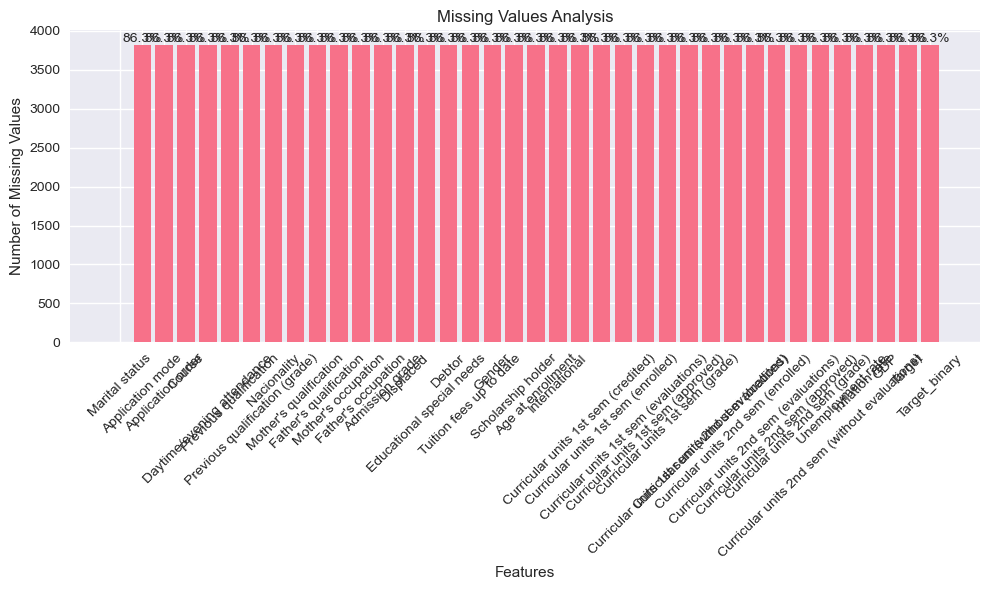

Missing values summary:
                                                Missing Count  \
Application mode                                         3816   
Application order                                        3816   
Course                                                   3816   
Daytime/evening attendance                               3816   
Previous qualification                                   3817   
Previous qualification (grade)                           3817   
Nacionality                                              3817   
Mother's qualification                                   3817   
Father's qualification                                   3817   
Mother's occupation                                      3817   
Father's occupation                                      3817   
Admission grade                                          3817   
Displaced                                                3817   
Educational special needs                                3817   
D

In [158]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(missing_data)), missing_data.values)
plt.title('Missing Values Analysis')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(range(len(missing_data)), missing_data.index, rotation=45)

# Add percentage labels on bars
for i, (bar, percent) in enumerate(zip(bars, missing_percent.values)):
    if percent > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{percent:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Missing values summary:")
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_summary[missing_summary['Missing Count'] > 0])

In [159]:
# Make sure column names are clean
df.columns = df.columns.str.strip()

# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(" Features:")
print(features)


 Features:
Index(['Marital status', 'Course', 'Daytime/evening attendance', 'Nacionality',
       'Displaced', 'Educational special needs', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')


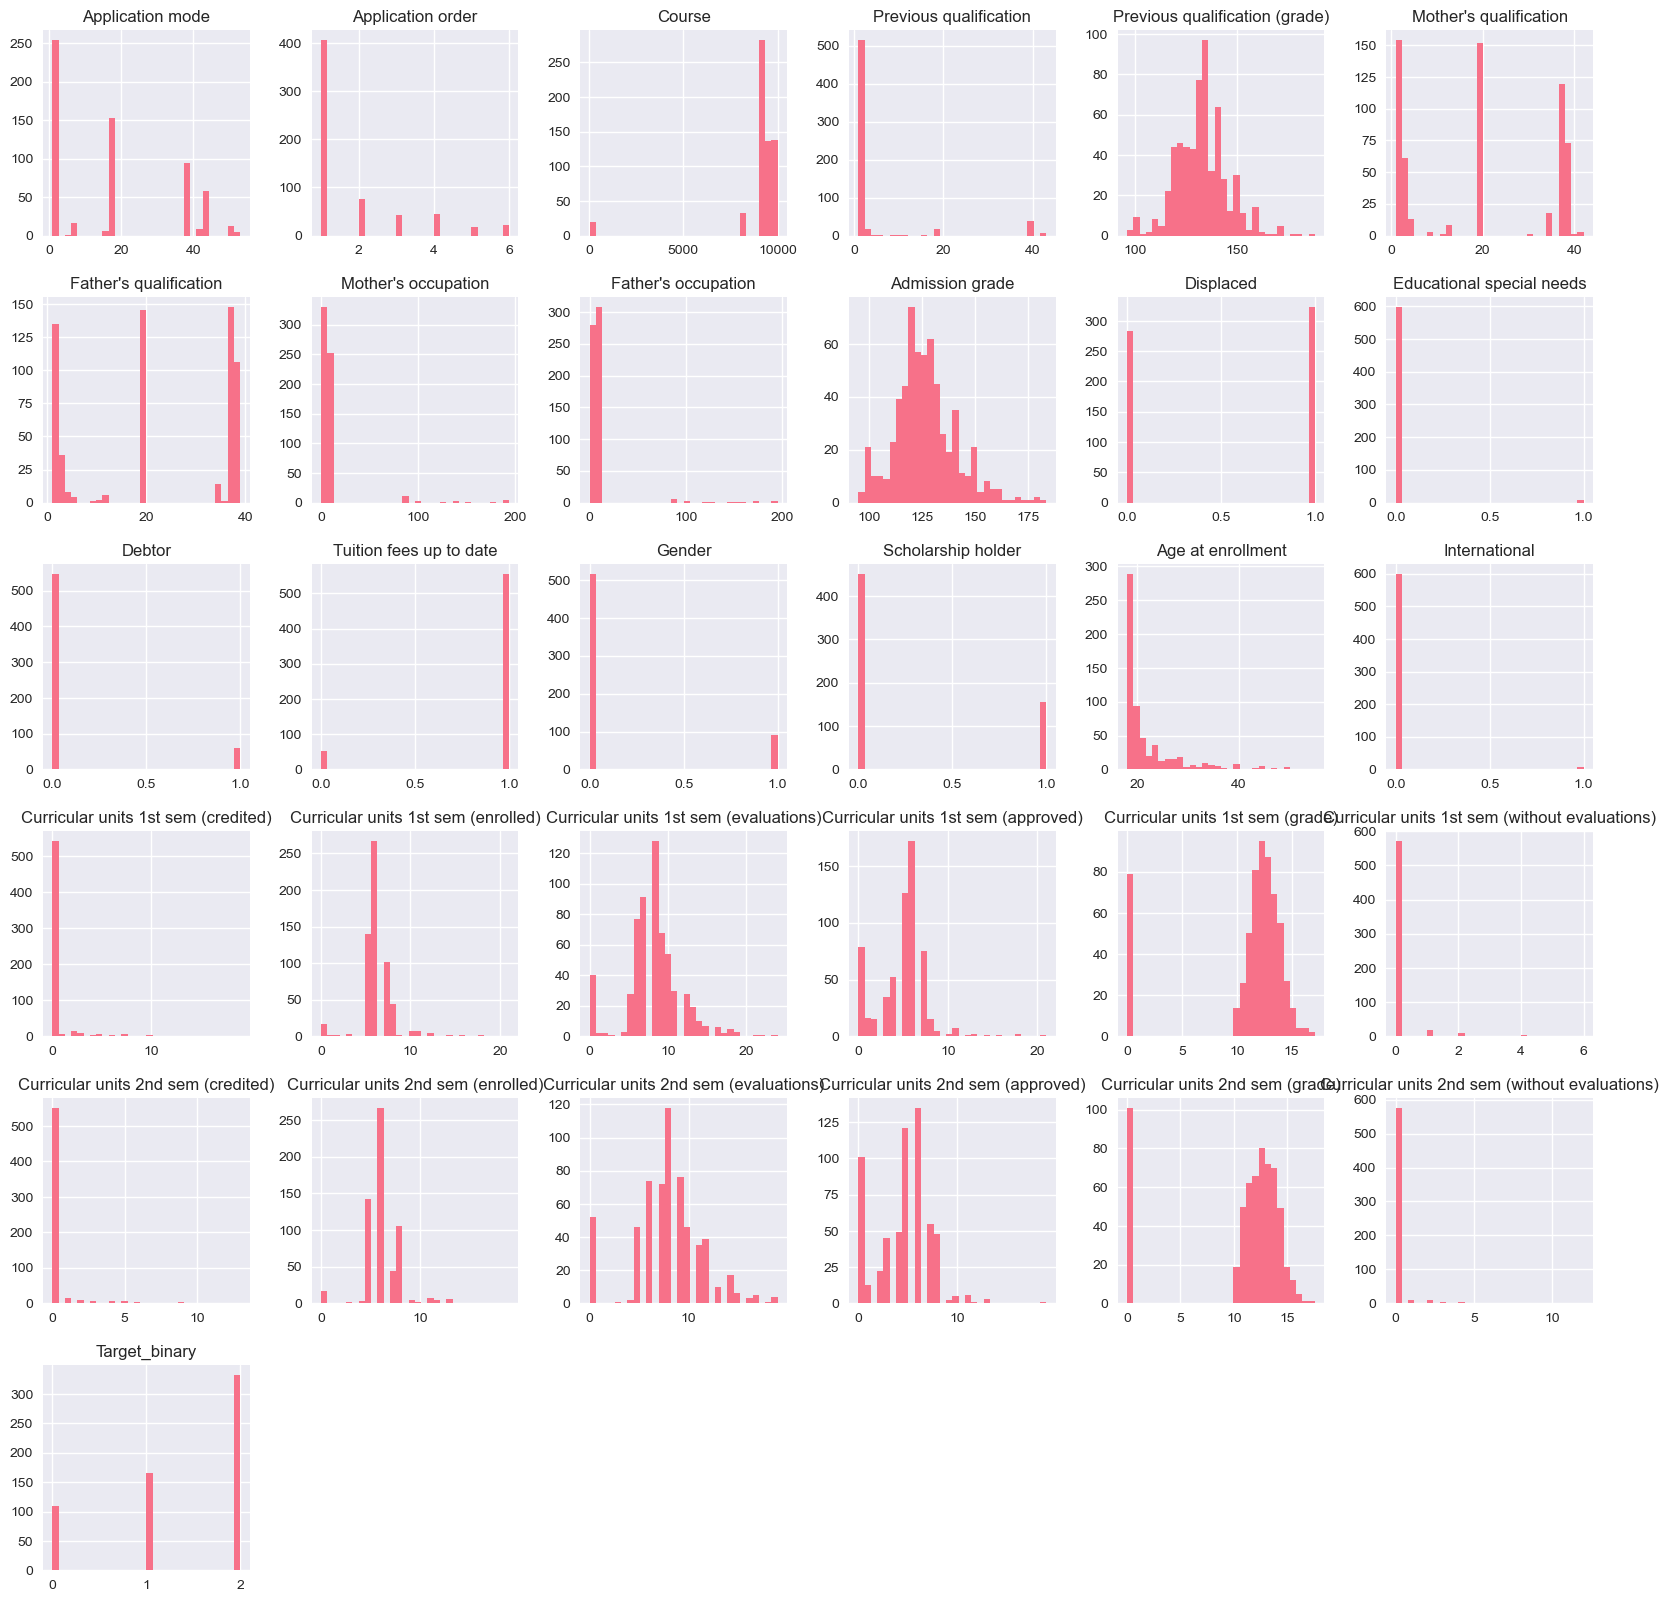

In [160]:
# Distribution plots for numerical features
features = ['Application mode', 'Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)',
                       "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 
                      'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 
                      'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 
                      'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                      'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                      'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                      'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Target_binary']

df[features].hist(figsize=(20, 20), bins=30)
plt.show()




In [161]:
# target_corr = correlation_matrix['Target_binary'].abs().sort_values(ascending=False)
# print("\nTop correlations with Target_binary:")
# print(target_corr[1:6])  # exclude target itself


In [162]:

# Handle missing values
print("Before cleaning:")
print(f"Shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

# Drop rows with missing values (only a few rows)
df_clean = df.dropna()

print("\nAfter cleaning:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Target distribution after cleaning:")
print(df_clean['Target'].value_counts())

Before cleaning:
Shape: (4424, 38)
Missing values: 141225

After cleaning:
Shape: (607, 38)
Missing values: 0
Target distribution after cleaning:
Target
Graduate    333
Dropout     165
Enrolled    109
Name: count, dtype: int64


In [163]:
# Separate features and target

X = df_clean.drop(columns=['Target', 'Target_binary'], errors='ignore')
y = df_clean[target_col]

print("Initial feature columns:")
print(X.columns.tolist())
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nTarget distribution:")
print(y.value_counts(normalize=True))

Initial feature columns:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP'

In [164]:
# ============================================
# 🧾 2. Define columns to drop safely
# ============================================
features_to_drop = [
    'Application mode', 'Application order', 'Previous qualification', 'Previous qualification (grade)',
    "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 
    'Admission grade', 'Debtor', 'International', 'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]

# Drop only columns that exist (avoids KeyError)
existing_features_to_drop = [col for col in features_to_drop if col in X.columns]
X = X.drop(columns=existing_features_to_drop)

print(f"\nDropped {len(existing_features_to_drop)} columns.")
print(f"Remaining feature count: {X.shape[1]}")



Dropped 17 columns.
Remaining feature count: 19


In [165]:
# After dropping and before splitting
print("✅ Final features used for training/prediction:")
print(X.columns.tolist())
print(f"\nTotal number of features: {len(X.columns)}")


✅ Final features used for training/prediction:
['Marital status', 'Course', 'Daytime/evening attendance', 'Nacionality', 'Displaced', 'Educational special needs', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']

Total number of features: 19


In [134]:
# ============================================
# ✂️ 3. Split data into train, validation, test
# ============================================
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("\nTraining target distribution:")
print(y_train.value_counts(normalize=True))


Training set: 363 samples
Validation set: 122 samples
Test set: 122 samples

Training target distribution:
Target
Graduate    0.548209
Dropout     0.272727
Enrolled    0.179063
Name: proportion, dtype: float64


In [166]:
# ============================================
# ⚙️ 4. Scale features (Preprocessing)
# ============================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing completed:")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Validation set scaled shape: {X_val_scaled.shape}")
print(f"Test set scaled shape: {X_test_scaled.shape}")


Preprocessing completed:
Training set scaled shape: (363, 19)
Validation set scaled shape: (122, 19)
Test set scaled shape: (122, 19)


In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# BASELINE ML MODEL TRAINING
# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# Get prediction probabilities
y_train_proba = model.predict_proba(X_train_scaled)
y_val_proba = model.predict_proba(X_val_scaled)
y_test_proba = model.predict_proba(X_test_scaled)

print("Model training completed!")
print(f"Training accuracy: {model.score(X_train_scaled, y_train):.4f}")
print(f"Validation accuracy: {model.score(X_val_scaled, y_val):.4f}")
print(f"Test accuracy: {model.score(X_test_scaled, y_test):.4f}")

# Calculate performance metrics (multiclass)
lr_train_acc = accuracy_score(y_train, y_train_pred)
lr_test_acc = accuracy_score(y_test, y_test_pred)
lr_test_precision = precision_score(y_test, y_test_pred, average='weighted')
lr_test_recall = recall_score(y_test, y_test_pred, average='weighted')
lr_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nLogistic Regression Results:")
print(f"   Train Accuracy: {lr_train_acc:.4f}")
print(f"   Test Accuracy: {lr_test_acc:.4f}")
print(f"   Test Precision (weighted): {lr_test_precision:.4f}")
print(f"   Test Recall (weighted): {lr_test_recall:.4f}")
print(f"   Test F1-Score (weighted): {lr_test_f1:.4f}")

print("\nInterpretation:")
print(f"- Accuracy of {lr_test_acc:.3f} means {lr_test_acc*100:.1f}% correct predictions")
print(f"- Weighted Precision of {lr_test_precision:.3f} means model is good at minimizing false positives")
print(f"- Weighted Recall of {lr_test_recall:.3f} means model captures most actual classes")
print(f"- F1-Score balances precision and recall across all classes")



Model training completed!
Training accuracy: 0.7906
Validation accuracy: 0.7295
Test accuracy: 0.7623

Logistic Regression Results:
   Train Accuracy: 0.7906
   Test Accuracy: 0.7623
   Test Precision (weighted): 0.7390
   Test Recall (weighted): 0.7623
   Test F1-Score (weighted): 0.7453

Interpretation:
- Accuracy of 0.762 means 76.2% correct predictions
- Weighted Precision of 0.739 means model is good at minimizing false positives
- Weighted Recall of 0.762 means model captures most actual classes
- F1-Score balances precision and recall across all classes


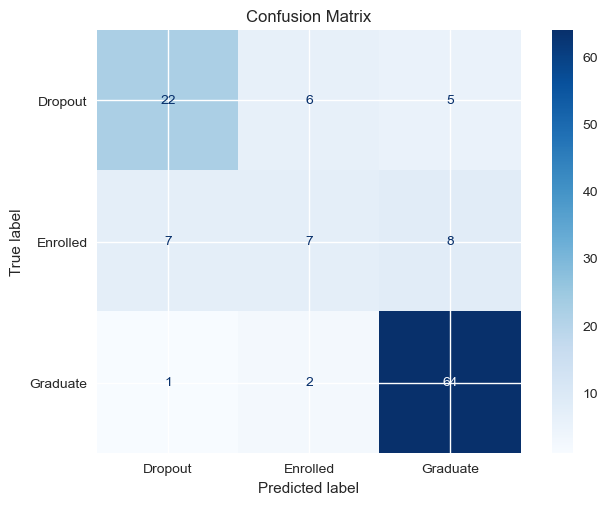

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [169]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Classification Report:
              precision    recall  f1-score   support

     Dropout       0.73      0.67      0.70        33
    Enrolled       0.47      0.32      0.38        22
    Graduate       0.83      0.96      0.89        67

    accuracy                           0.76       122
   macro avg       0.68      0.65      0.66       122
weighted avg       0.74      0.76      0.75       122



In [170]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Cross-Validation Accuracy: 0.7438 ± 0.0348


In [171]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    acc = clf.score(X_val_scaled, y_val)
    print(f"{name:25s}: Validation Accuracy = {acc:.4f}")


Logistic Regression      : Validation Accuracy = 0.7295
Random Forest            : Validation Accuracy = 0.7623
Gradient Boosting        : Validation Accuracy = 0.7459
SVM                      : Validation Accuracy = 0.7295
KNN                      : Validation Accuracy = 0.7623


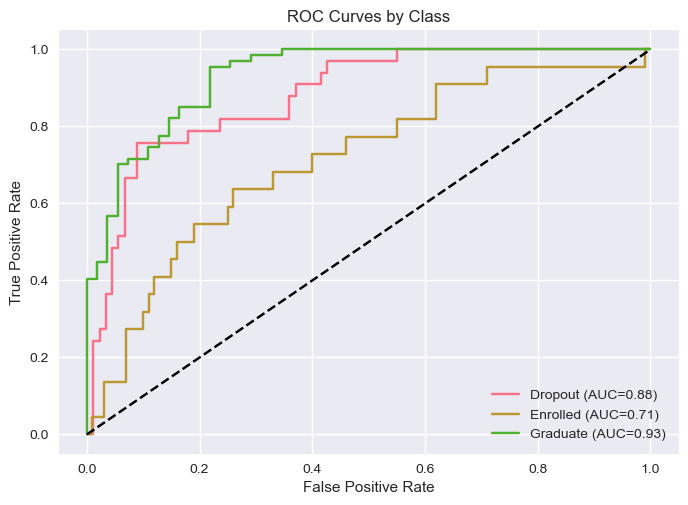

In [172]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# For multiclass targets
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_score = model.predict_proba(X_test_scaled)

for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'{class_label} (AUC={auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves by Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [173]:
importance = model.coef_[0]
features = X_train.columns

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(importance)
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
                                Feature  Importance
14  Curricular units 2nd sem (approved)    1.052378
15     Curricular units 2nd sem (grade)    0.994177
13  Curricular units 2nd sem (enrolled)    0.841081
11  Curricular units 1st sem (approved)    0.697803
6               Tuition fees up to date    0.487930
5             Educational special needs    0.349841
12     Curricular units 1st sem (grade)    0.347551
9                     Age at enrollment    0.309852
3                           Nacionality    0.272117
8                    Scholarship holder    0.237973


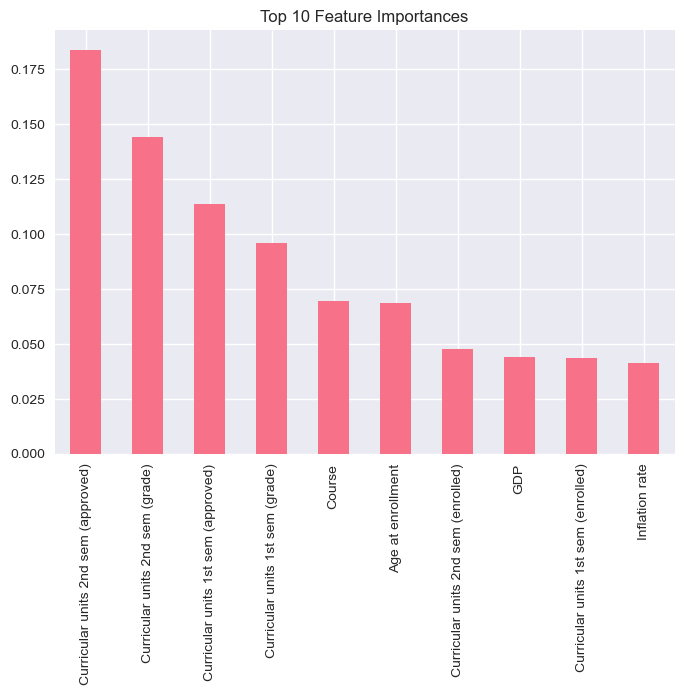

In [174]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


In [175]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print(f"\nBest Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Score: {grid.best_score_:.4f}")



Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.7493


Unique values in target: ['Graduate' 'Dropout' 'Enrolled']
 Per-Class Performance on Test Set:
              precision    recall  f1-score   support

     Dropout       0.73      0.67      0.70        33
    Enrolled       0.47      0.32      0.38        22
    Graduate       0.83      0.96      0.89        67

    accuracy                           0.76       122
   macro avg       0.68      0.65      0.66       122
weighted avg       0.74      0.76      0.75       122



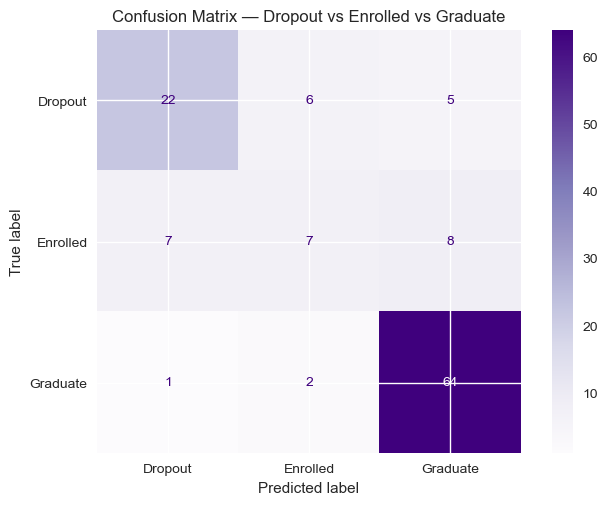

Class 'Dropout' Accuracy: 0.667
Class 'Enrolled' Accuracy: 0.318
Class 'Graduate' Accuracy: 0.955


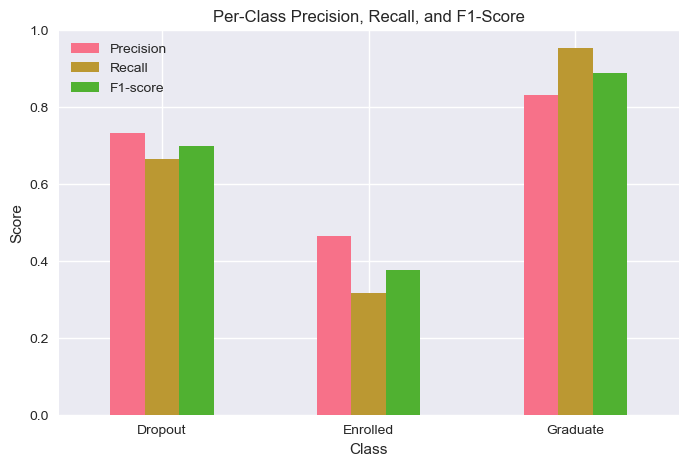

In [177]:
print("Unique values in target:", y_test.unique())

from sklearn.metrics import classification_report

print(" Per-Class Performance on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred, labels=['Dropout', 'Enrolled', 'Graduate'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Enrolled', 'Graduate'])
disp.plot(cmap='Purples', values_format='d')
plt.title("Confusion Matrix — Dropout vs Enrolled vs Graduate")
plt.show()

for label in ['Dropout', 'Enrolled', 'Graduate']:
    idx = y_test == label
    acc = (y_test_pred[idx] == y_test[idx]).mean()
    print(f"Class '{label}' Accuracy: {acc:.3f}")

from sklearn.metrics import precision_score, recall_score, f1_score

classes = ['Dropout', 'Enrolled', 'Graduate']
precision = precision_score(y_test, y_test_pred, average=None, labels=classes)
recall = recall_score(y_test, y_test_pred, average=None, labels=classes)
f1 = f1_score(y_test, y_test_pred, average=None, labels=classes)

metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
})
metrics_df.plot(x='Class', kind='bar', figsize=(8,5))
plt.title("Per-Class Precision, Recall, and F1-Score")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

In [179]:
# Create complete pipeline
complete_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ))
])

# Fit the complete pipeline
complete_pipeline.fit(X_train, y_train)

# Save the complete pipeline
import os
os.makedirs('../data', exist_ok=True)

joblib.dump(complete_pipeline, 'multiclass_classification_model.pkl')
# joblib.dump(preprocessor, '../data/multiclass_classification_preprocessor.pkl')

print("Models saved successfully!")
print("Files created:")
# print("- ../data/multiclass_classification_preprocessor.pkl")

# Test the saved model
loaded_pipeline = joblib.load('../data/multiclass_classification_model.pkl')
test_prediction = loaded_pipeline.predict(X_test.iloc[:1])
test_probability = loaded_pipeline.predict_proba(X_test.iloc[:1])

print(f"\nTest prediction on first sample: {test_prediction[0]}")
print(f"Prediction probabilities: {dict(zip(loaded_pipeline.classes_, test_probability[0]))}")

Models saved successfully!
Files created:

Test prediction on first sample: Graduate
Prediction probabilities: {'Dropout': np.float64(0.10389107326328251), 'Enrolled': np.float64(0.25830138244499135), 'Graduate': np.float64(0.6378075442917263)}


In [180]:
# Export final feature list for deployment
final_feature_list = X.columns.tolist()
print("\nFinal feature list for deployment:")
print(final_feature_list)
# Optionally save to file for reference
with open('final_feature_list.txt', 'w') as f:
    for feat in final_feature_list:
        f.write(f"{feat}\n")


Final feature list for deployment:
['Marital status', 'Course', 'Daytime/evening attendance', 'Nacionality', 'Displaced', 'Educational special needs', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [181]:
# === RE-EXPORT MODEL AND FEATURE LIST WITH ALL ORIGINAL FEATURES ===
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Use all columns except target columns
X_full = df.drop(columns=['Target', 'Target_binary'], errors='ignore')
y_full = df['Target_binary']

# Create pipeline
complete_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ))
])

# Fit pipeline on all features
complete_pipeline.fit(X_full, y_full)

# Save model and feature list for deployment
joblib.dump(complete_pipeline, 'multiclass_classification_model.pkl')
with open('final_feature_list.txt', 'w') as f:
    for feat in X_full.columns:
        f.write(f"{feat}\n")
print("Model and feature list saved. Use these for Streamlit deployment.")

ValueError: could not convert string to float: '1;17;1;9085;1;1;127.0;1;19;38;194;193;117.6;0;0;0;1;0;0;18;0;0;6;0;0;0.0;0;0;6;0;0;0.0;0;12.4;0.5;1.79;Dropout'